In [1]:
from BaseResourceSimulation import BaseResourceSimulation
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import numpy as np

In [2]:
def simulate(simulation_args, num_timesteps=50, repeat=1):
    
    simulation_args['seed'] = repeat
    
    # Run the model
    model = BaseResourceSimulation(**simulation_args)
    
    for i in range(num_timesteps):
        model.run_timestep()

    return np.array(model.get_history()['resources'])

def sim_repeated(simulation_args, num_timesteps=50, n_repeats=50):
    
    n_repeats = 128
    
    resources = Parallel(n_jobs=8)(delayed(simulate)(simulation_args=simulation_args.copy(),
                                                     num_timesteps=num_timesteps,
                                                     repeat=i) for i in range(n_repeats))
    return np.mean(resources, axis=0)

Simulation 1, adjust just base spreading rate

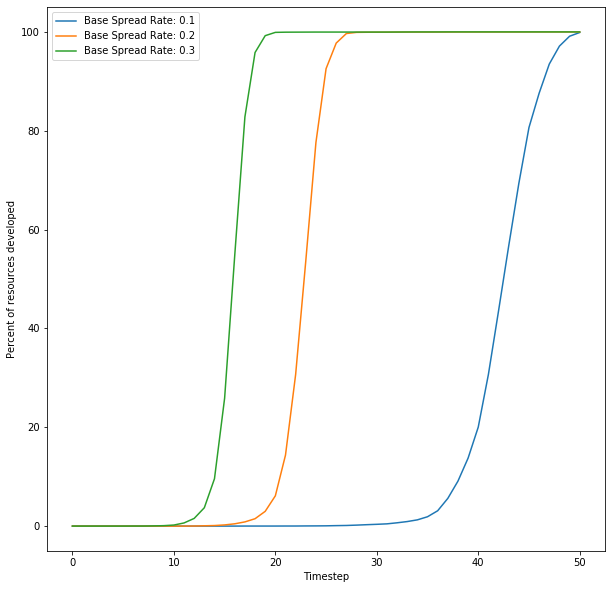

In [3]:
simulation_args = {
    "outer_G_args" : {
    'n_resources' : 100,
    'n_communities' : 100,
    'comm_to_resource_p' : .05
    },
    
     "comm_G_args" : {
    'n': 100,
    'k': 3,
    'p': .2
    },
    
    "base_spread_p" : .2,
    "init_pro_dev_p" : .1,
    
    "dist_scale" : 1,
    "com_threshold" : .5,
    "vote_threshold" : .5,
    
    "outside_influence_k" : .1,
    "already_developed_p" : 0,
    "vote_every" : 1,
}

plt.figure(figsize=(10, 10))

for base_spread_p in [.1, .2, .3]:
    simulation_args["base_spread_p"] = base_spread_p
    resources = sim_repeated(simulation_args, num_timesteps=50, n_repeats=32)
    plt.plot(resources, label='Base Spread Rate: ' + str(base_spread_p))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.savefig('Figure1.png')
plt.show()

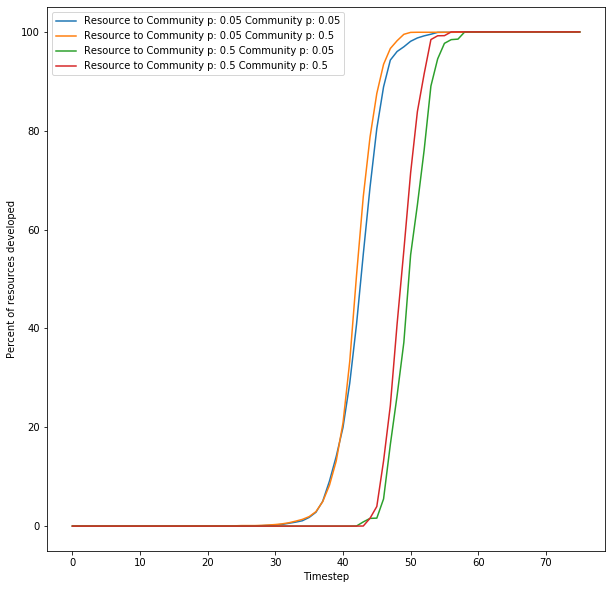

In [4]:
simulation_args = {
    "outer_G_args" : {
    'n_resources' : 100,
    'n_communities' : 100,
    'comm_to_resource_p' : .05
    },
    
     "comm_G_args" : {
    'n': 100,
    'k': 3,
    'p': .2
    },
    
    "base_spread_p" : .1,
    "init_pro_dev_p" : .1,
    
    "dist_scale" : 1,
    "com_threshold" : .5,
    "vote_threshold" : .5,
    
    "outside_influence_k" : .1,
    "already_developed_p" : 0,
    "vote_every" : 1,
}

plt.figure(figsize=(10, 10))

for comm_to_resource_p in [.05, .5]:
    for p in [.05, .5]:
        simulation_args["outer_G_args"]['comm_to_resource_p'] = comm_to_resource_p
        simulation_args["comm_G_args"]['p'] = p
        resources = sim_repeated(simulation_args, num_timesteps=75, n_repeats=32)
        plt.plot(resources, label='Resource to Community p: ' + str(comm_to_resource_p) + ' Community p: ' + str(p))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.savefig('Figure2.png')
plt.show()

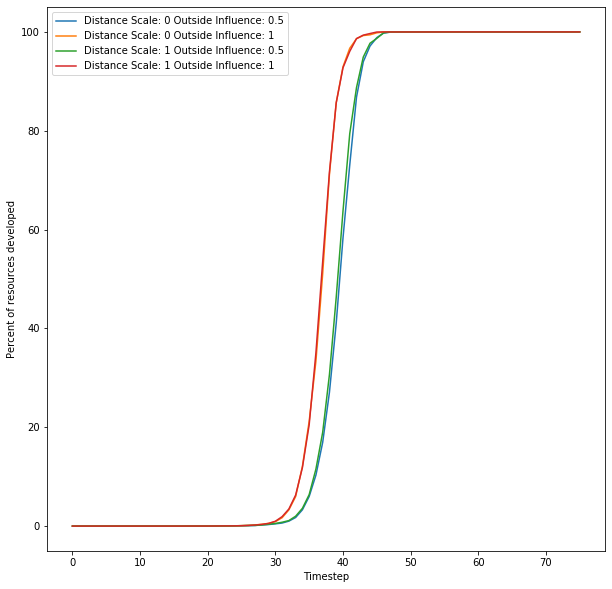

In [5]:
simulation_args = {
    "outer_G_args" : {
    'n_resources' : 100,
    'n_communities' : 100,
    'comm_to_resource_p' : .05
    },
    
     "comm_G_args" : {
    'n': 100,
    'k': 3,
    'p': .2
    },
    
    "base_spread_p" : .1,
    "init_pro_dev_p" : .1,
    
    "dist_scale" : 1,
    "outside_influence_k" : .1,
    
    "com_threshold" : .5,
    "vote_threshold" : .5,

    "already_developed_p" : 0,
    "vote_every" : 1,
}

plt.figure(figsize=(10, 10))

for dist_scale in [0, 1]:
    for outside_influence_k in [.5, 1]:
        
        simulation_args["dist_scale"] = dist_scale
        simulation_args["outside_influence_k"] = outside_influence_k
        
        resources = sim_repeated(simulation_args, num_timesteps=75, n_repeats=32)
        plt.plot(resources, label='Distance Scale: ' + str(dist_scale) + ' Outside Influence: ' + str(outside_influence_k))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.savefig('Figure3.png')
plt.show()

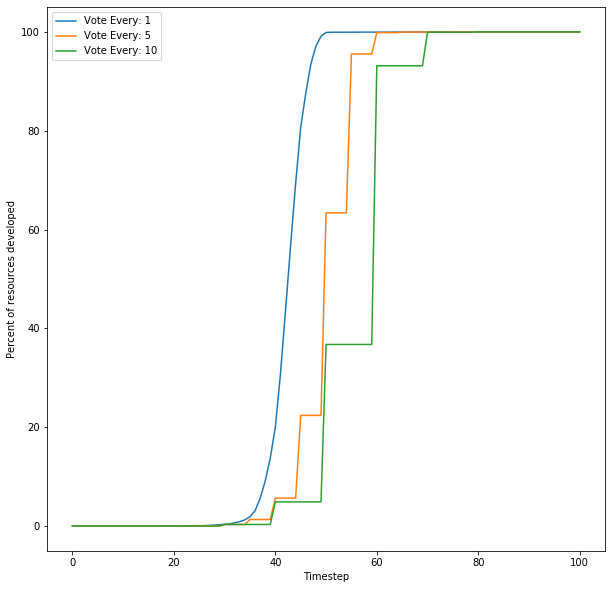

In [6]:
simulation_args = {
    "outer_G_args" : {
    'n_resources' : 100,
    'n_communities' : 100,
    'comm_to_resource_p' : .05
    },
    
     "comm_G_args" : {
    'n': 100,
    'k': 3,
    'p': .2
    },
    
    "base_spread_p" : .1,
    "init_pro_dev_p" : .1,
    
    "dist_scale" : 1,
    "com_threshold" : .5,
    "vote_threshold" : .5,
    
    "outside_influence_k" : .1,
    "already_developed_p" : 0,
    "vote_every" : 1,
}

plt.figure(figsize=(10, 10))

for vote_every in [1, 5, 10]:
    simulation_args["vote_every"] = vote_every
    resources = sim_repeated(simulation_args, num_timesteps=100, n_repeats=32)
    plt.plot(resources, label='Vote Every: ' + str(vote_every))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.savefig('Figure4.png')
plt.show()

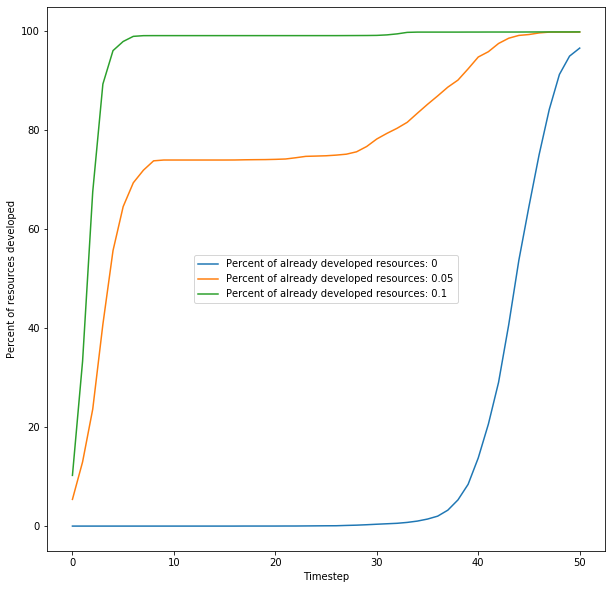

In [7]:
simulation_args = {
    "outer_G_args" : {
    'n_resources' : 100,
    'n_communities' : 100,
    'comm_to_resource_p' : .05
    },
    
     "comm_G_args" : {
    'n': 100,
    'k': 3,
    'p': .2
    },
    
    "base_spread_p" : .1,
    "init_pro_dev_p" : .1,
    
    "dist_scale" : 1,
    "com_threshold" : .5,
    "vote_threshold" : .5,
    
    "outside_influence_k" : 0,
    "already_developed_p" : 0,
    "vote_every" : 1,
}

plt.figure(figsize=(10, 10))

for already_developed_p in [0, .05, .1]:
    simulation_args["already_developed_p"] = already_developed_p
    resources = sim_repeated(simulation_args, num_timesteps=50, n_repeats=32)
    plt.plot(resources, label='Percent of already developed resources: ' + str(already_developed_p))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.savefig('Figure5.png')
plt.show()

In [8]:
simulation_args = {
    "outer_G_args" : {
    'n_resources' : 100,
    'n_communities' : 100,
    'comm_to_resource_p' : .05
    },
    
     "comm_G_args" : {
    'n': 100,
    'k': 3,
    'p': .2
    },
    
    "base_spread_p" : .01,
    "init_pro_dev_p" : .1,
    
    "dist_scale" : 1,
    "outside_influence_k" : .1,
    
    "com_threshold" : .5,
    "vote_threshold" : .5,

    "already_developed_p" : 0,
    "vote_every" : 1,
}

plt.figure(figsize=(10, 10))

for dist_scale in [0, 1]:
    for outside_influence_k in [0, .5, 1]:
        
        simulation_args["dist_scale"] = dist_scale
        simulation_args["outside_influence_k"] = outside_influence_k
        
        resources = sim_repeated(simulation_args, num_timesteps=150, n_repeats=32)
        plt.plot(resources, label='Distance Scale: ' + str(dist_scale) + ' Outside Influence: ' + str(outside_influence_k))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.savefig('Figure6.png')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/sage/anaconda3/lib/python3.6/site-packages/joblib/parallel.py", line 833, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/home/sage/anaconda3/lib/python3.6/site-packages/joblib/_parallel_backends.py", line 521, in wrap_future_result
    return future.result(timeout=timeout)
  File "/home/sage/anaconda3/lib/python3.6/concurrent/futures/_base.py", line 427, in result
    self._condition.wait(timeout)
  File "/home/sage/anaconda3/lib/python3.6/threading.py", line 295, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/sage/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-3a0f02c745a7>", line 35, in <module>
    resources = sim_repeated(simulation_args, num_timesteps=150, n_rep

TypeError: must be str, not list